In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

In [10]:
def ShowImage(title,img,ctype):
    
    plt.figure(figsize=(10, 10))
    if ctype=='bgr':
        b,g,r = cv2.split(img)       
        rgb_img = cv2.merge([r,g,b])   
        plt.imshow(rgb_img)
    elif ctype=='hsv':
        rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
        plt.imshow(rgb)
    elif ctype=='gray':
        plt.imshow(img,cmap='gray')
    elif ctype=='rgb':
        plt.imshow(img)
    else:
        raise Exception("Unknown colour type")
    plt.axis('off')
    plt.title(title)
    plt.show()


def get_brain(img):
    row_size = img.shape[0]
    col_size = img.shape[1]

    mean = np.mean(img)
    std = np.std(img)
    img = img - mean
    img = img / std

    middle = img[int(col_size / 5):int(col_size / 5 * 4), int(row_size / 5):int(row_size / 5 * 4)]
    mean = np.mean(middle)
    max = np.max(img)
    min = np.min(img)


    img[img == max] = mean
    img[img == min] = mean

    kmeans = KMeans(n_clusters=2).fit(np.reshape(middle, [np.prod(middle.shape), 1]))
    centers = sorted(kmeans.cluster_centers_.flatten())
    threshold = np.mean(centers)
    thresh_img = np.where(img < threshold, 1.0, 0.0)  


    eroded = morphology.erosion(thresh_img, np.ones([3, 3]))
    dilation = morphology.dilation(eroded, np.ones([5, 5]))

In [7]:
! ls -d 

.


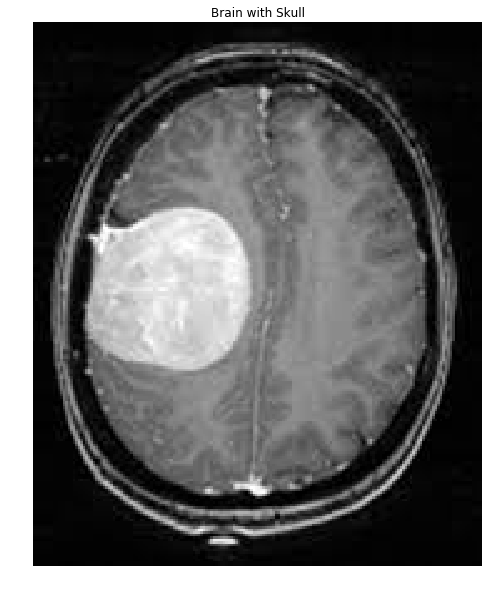

True

In [23]:
img = cv2.imread('brain_tumor_dataset/yes/Y1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')


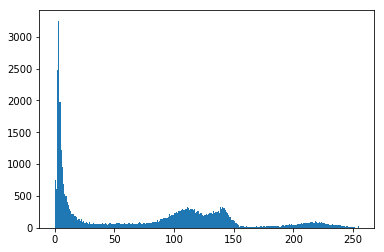

In [12]:
plt.hist(gray.ravel(),256)
plt.show()

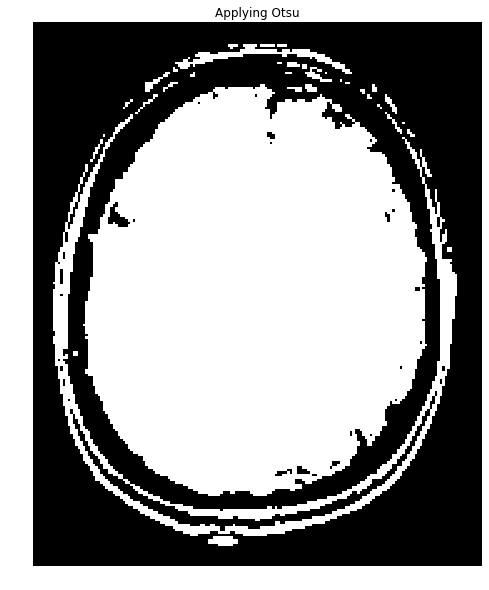

In [13]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

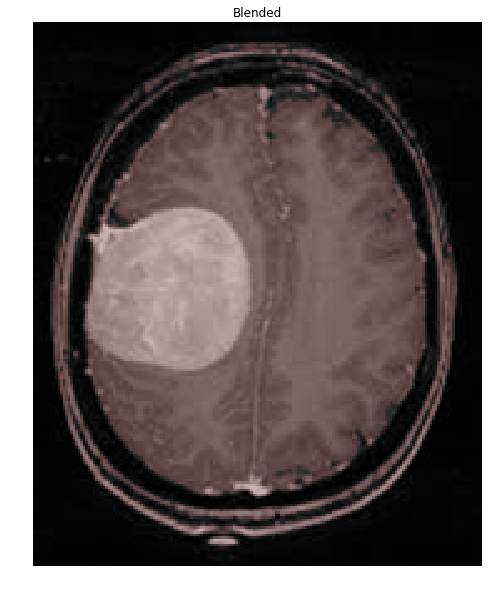

In [14]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

In [16]:
from PIL import Image  
import PIL

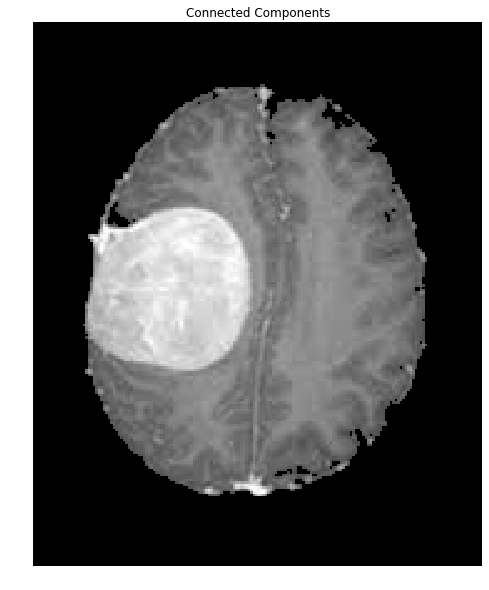

In [18]:
ret, markers = cv2.connectedComponents(thresh)


marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
largest_component = np.argmax(marker_area)+1                      

brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

In [28]:
cv2.imwrite('test2.jpg', brain_out)

True

In [30]:
! mkdir SKULL_STRIP 

In [31]:
! mkdir SKULL_STRIP/TRAIN SKULL_STRIP/TEST SKULL_STRIP/VAL 

In [32]:
! mkdir SKULL_STRIP/TRAIN/YES SKULL_STRIP/TRAIN/NO SKULL_STRIP/TEST/YES SKULL_STRIP/TEST/NO SKULL_STRIP/VAL/YES SKULL_STRIP/VAL/NO

In [41]:
import tqdm 
import os 

In [50]:
dir_path = 'TRAIN/'
X = []
y = []
i = 0
labels = dict()

for path in sorted(os.listdir(dir_path)):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
                    
                    colormask = np.zeros(img.shape, dtype=np.uint8)
                    colormask[thresh!=0] = np.array((0,0,255))
                    blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
                    
                    ret, markers = cv2.connectedComponents(thresh)


                    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
                    largest_component = np.argmax(marker_area)+1                      
                    brain_mask = markers==largest_component
                    brain_out = img.copy()
                    brain_out[brain_mask==False] = (0,0,0)
                    
                    cv2.imwrite('SKULL_STRIP/' + dir_path + path + '/' + file, brain_out)
                    
                    

                    
                    

In [51]:
dir_path = 'TEST/'
X = []
y = []
i = 0
labels = dict()

for path in sorted(os.listdir(dir_path)):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
                    
                    colormask = np.zeros(img.shape, dtype=np.uint8)
                    colormask[thresh!=0] = np.array((0,0,255))
                    blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
                    
                    ret, markers = cv2.connectedComponents(thresh)


                    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
                    largest_component = np.argmax(marker_area)+1                      
                    brain_mask = markers==largest_component
                    brain_out = img.copy()
                    brain_out[brain_mask==False] = (0,0,0)
                    
                    cv2.imwrite('SKULL_STRIP/' + dir_path + path + '/' + file, brain_out)

In [52]:
dir_path = 'VAL/'
X = []
y = []
i = 0
labels = dict()

for path in sorted(os.listdir(dir_path)):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
                    
                    colormask = np.zeros(img.shape, dtype=np.uint8)
                    colormask[thresh!=0] = np.array((0,0,255))
                    blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
                    
                    ret, markers = cv2.connectedComponents(thresh)


                    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
                    largest_component = np.argmax(marker_area)+1                      
                    brain_mask = markers==largest_component
                    brain_out = img.copy()
                    brain_out[brain_mask==False] = (0,0,0)
                    
                    cv2.imwrite('SKULL_STRIP/' + dir_path + path + '/' + file, brain_out)

['YES', 'NO']
